#Part1

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [2]:
# Hyperparameters
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Neural network model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        images = images.reshape(-1, 28*28)
        labels = labels
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        labels = labels
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

100%|██████████| 9912422/9912422 [00:00<00:00, 157185459.58it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 103623348.01it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 176425800.93it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21381064.84it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/5], Step [100/600], Loss: 0.3379
Epoch [1/5], Step [200/600], Loss: 0.2505
Epoch [1/5], Step [300/600], Loss: 0.2354
Epoch [1/5], Step [400/600], Loss: 0.2294
Epoch [1/5], Step [500/600], Loss: 0.2541
Epoch [1/5], Step [600/600], Loss: 0.2091
Epoch [2/5], Step [100/600], Loss: 0.1404
Epoch [2/5], Step [200/600], Loss: 0.1980
Epoch [2/5], Step [300/600], Loss: 0.1215
Epoch [2/5], Step [400/600], Loss: 0.2495
Epoch [2/5], Step [500/600], Loss: 0.1824
Epoch [2/5], Step [600/600], Loss: 0.1299
Epoch [3/5], Step [100/600], Loss: 0.1124
Epoch [3/5], Step [200/600], Loss: 0.0928
Epoch [3/5], Step [300/600], Loss: 0.2222
Epoch [3/5], Step [400/600], Loss: 0.1496
Epoch [3/5], Step [500/600], Loss: 0.1889
Epoch [3/5], Step [600/600], Loss: 0.1643
Epoch [4/5], Step [100/600], Loss: 0.1176
Epoch [4/5], Step [200/600], Loss: 0.0883
Epoch [4/5], Step [300/600], Loss: 0.1457
Epoch [4/5], Step [400/600], Loss: 0.2748
E

#Part2

In [3]:
# Hyperparameters
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Convolutional neural network model
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*64, 10)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images
        labels = labels
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images
        labels = labels
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Epoch [1/5], Step [100/600], Loss: 0.2293
Epoch [1/5], Step [200/600], Loss: 0.0276
Epoch [1/5], Step [300/600], Loss: 0.1336
Epoch [1/5], Step [400/600], Loss: 0.0237
Epoch [1/5], Step [500/600], Loss: 0.0471
Epoch [1/5], Step [600/600], Loss: 0.0751
Epoch [2/5], Step [100/600], Loss: 0.0551
Epoch [2/5], Step [200/600], Loss: 0.0436
Epoch [2/5], Step [300/600], Loss: 0.0496
Epoch [2/5], Step [400/600], Loss: 0.0261
Epoch [2/5], Step [500/600], Loss: 0.0471
Epoch [2/5], Step [600/600], Loss: 0.0656
Epoch [3/5], Step [100/600], Loss: 0.0084
Epoch [3/5], Step [200/600], Loss: 0.0178
Epoch [3/5], Step [300/600], Loss: 0.0041
Epoch [3/5], Step [400/600], Loss: 0.0113
Epoch [3/5], Step [500/600], Loss: 0.0631
Epoch [3/5], Step [600/600], Loss: 0.0040
Epoch [4/5], Step [100/600], Loss: 0.0064
Epoch [4/5], Step [200/600], Loss: 0.1080
Epoch [4/5], Step [300/600], Loss: 0.0043
Epoch [4/5], Step [400/600], Loss: 0.0057
Epoch [4/5], Step [500/600], Loss: 0.0369
Epoch [4/5], Step [600/600], Loss:

#Part3

In [37]:
import tensorflow as tf
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to [0, 1]
train_images_56 = train_images_56 / 255.0
test_images_56 = test_images_56 / 255.0

In [39]:
from random import randint, choice

height = 56
width = 56
def copy_image(source, x,y):
      dest = np.zeros((height,width), np.float32)
      dest[x:x+28,y:y+28] = source[:,:]
      return dest

def repositionData(data):
  repositioned = []
  for im in data:
    x = randint(0, 27)
    y = randint(0, 27)
    dest = copy_image(im, x,y)
    repositioned.append(dest)
  return np.array(repositioned)

x_train_repos = repositionData(train_images)
x_test_repos = repositionData(test_images)
trainX = x_train_repos.reshape((x_train_repos.shape[0], 56, 56, 1))
testX = x_test_repos.reshape((x_test_repos.shape[0], 56, 56, 1))

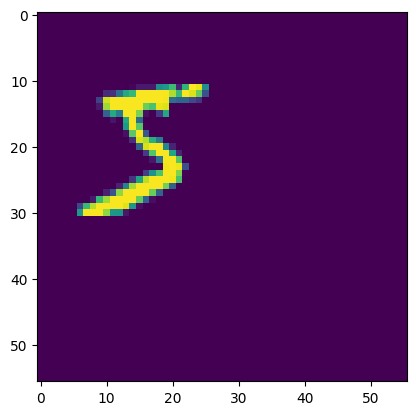

In [40]:
imgplot = plt.imshow(x_train_repos[0])
plt.show()

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Initialize the model
model = Sequential()

# Add the convolutional layers
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(56, 56, 1)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the fully connected layers
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 54, 54, 32)        320       
                                                                 
 conv2d_23 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 26, 26, 64)       0         
 g2D)                                                            
                                                                 
 flatten_40 (Flatten)        (None, 43264)             0         
                                                                 
 dense_93 (Dense)            (None, 128)               5537920   
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                     

In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
CNN = model.fit(trainX, train_labels, epochs=10, 
                    validation_data=(testX, test_labels))

Epoch 1/10
1875/1875 [==============================] - 25s 8ms/step - loss: 2.2035 - accuracy: 0.2078 - val_loss: 1.7271 - val_accuracy: 0.3825
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 1.3123 - accuracy: 0.5272 - val_loss: 0.4654 - val_accuracy: 0.8831
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.6021 - accuracy: 0.7974 - val_loss: 0.2287 - val_accuracy: 0.9372
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3620 - accuracy: 0.8820 - val_loss: 0.1855 - val_accuracy: 0.9457
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2506 - accuracy: 0.9177 - val_loss: 0.1678 - val_accuracy: 0.9525
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1906 - accuracy: 0.9371 - val_loss: 0.1677 - val_accuracy: 0.9533
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1499 - accuracy: 0.9497 - val_loss: 0.1522 - val_ac

In [45]:
print(CNN.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


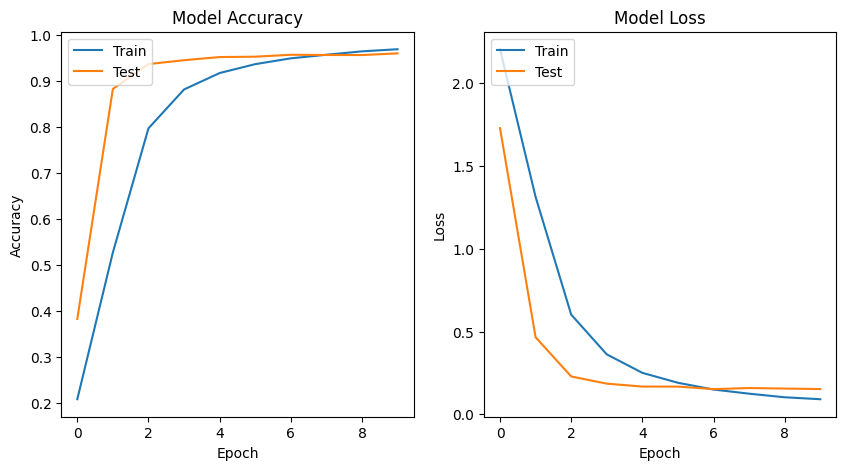

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot for accuracy on the first subplot
ax1.plot(CNN.history['accuracy'])
ax1.plot(CNN.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='upper left')

# Plot for loss on the second subplot
ax2.plot(CNN.history['loss'])
ax2.plot(CNN.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Test'], loc='upper left')

# Display the plot
plt.show()

In [47]:
modelDCNN = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(56, 56)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [49]:
predictions = modelDCNN(trainX[:1]).numpy()
predictions

tf.nn.softmax(predictions).numpy()

array([[1.0421600e-35, 0.0000000e+00, 4.4570970e-03, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.1556497e-34, 0.0000000e+00,
        9.9554294e-01, 0.0000000e+00]], dtype=float32)

In [53]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(train_labels[:1], predictions).numpy()

modelDCNN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=loss_fn,
              metrics=['accuracy'])

In [56]:
DCNN = modelDCNN.fit(trainX, train_labels, epochs=10, 
                    validation_data=(testX, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 11.3376 - accuracy: 0.1498 - val_loss: 2.3781 - val_accuracy: 0.1679
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2928 - accuracy: 0.1723 - val_loss: 2.2011 - val_accuracy: 0.1864
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1404 - accuracy: 0.2014 - val_loss: 2.1296 - val_accuracy: 0.2171
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0545 - accuracy: 0.2292 - val_loss: 2.0904 - val_accuracy: 0.2423
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9901 - accuracy: 0.2559 - val_loss: 2.0352 - val_accuracy: 0.2799
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9137 - accuracy: 0.2899 - val_loss: 1.9600 - val_accuracy: 0.3023
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8414 - accuracy: 0.3212 - val_loss: 1.9080 - val_accuracy

In [58]:
score = modelDCNN.evaluate(testX, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.7108144760131836
Test accuracy: 0.4309999942779541


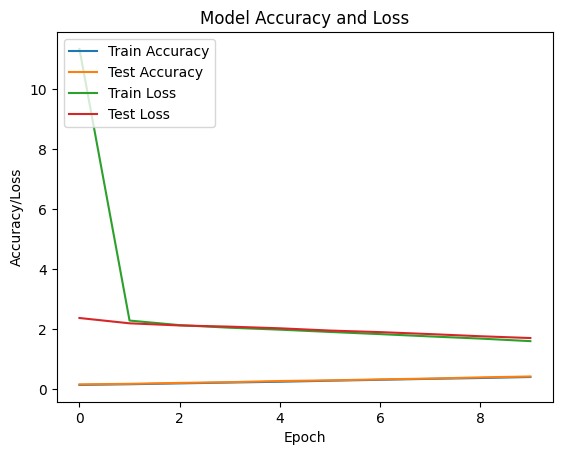

In [61]:
# Plot for accuracy and loss
plt.plot(DCNN.history['accuracy'])
plt.plot(DCNN.history['val_accuracy'])
plt.plot(DCNN.history['loss'])
plt.plot(DCNN.history['val_loss'])

plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Test Accuracy', 'Train Loss', 'Test Loss'], loc='upper left')
plt.show()

In [62]:
probability_model = tf.keras.Sequential([
  modelDCNN,
  tf.keras.layers.Softmax()
])

In [63]:
preds = probability_model(testX[:5])
prediction=tf.argmax(preds,1).numpy()
print(prediction)

[7 9 1 8 4]


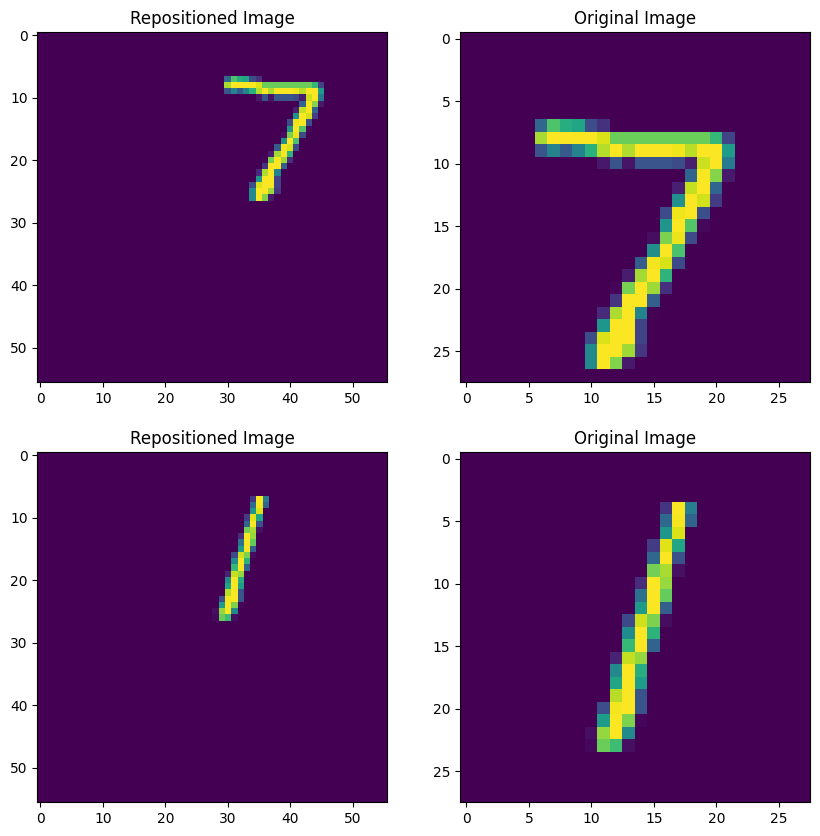

In [66]:
fig = plt.figure(figsize=(10, 10))

# Plot the first image
ax = fig.add_subplot(2, 2, 1)
ax.imshow(x_test_repos[0])
ax.set_title('Repositioned Image')

# Plot the second image
ax = fig.add_subplot(2, 2, 2)
ax.imshow(test_images[0])
ax.set_title('Original Image')

# Plot the third image
ax = fig.add_subplot(2, 2, 3)
ax.imshow(x_test_repos[2])
ax.set_title('Repositioned Image')

# Plot the fourth image
ax = fig.add_subplot(2, 2, 4)
ax.imshow(test_images[2])
ax.set_title('Original Image')

# Show the plot
plt.show()

#Part4

In [69]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [67]:
height = 56
width = 56
def copy_image(source, x,y):
      dest = np.zeros((height,width), np.float32)
      dest[x:x+28,y:y+28] = source[:,:]
      return dest
def repositionDataTrain(data):
  repositioned = []
  for im in data:
    x = randint(0, 2)
    y = randint(0, 27)
    dest = copy_image(im, x,y)
    repositioned.append(dest)
  return np.array(repositioned)
def repositionDataTest(data):
  repositioned = []
  for im in data:
    x = randint(0, 27)
    y = randint(0, 2)
    dest = copy_image(im, x,y)
    repositioned.append(dest)
  return np.array(repositioned)

In [70]:
x_train_repos= repositionDataTrain(x_train)
x_test_repos = repositionDataTest(x_test)
trainX = x_train_repos.reshape((x_train_repos.shape[0], 56, 56, 1))
testX = x_test_repos.reshape((x_test_repos.shape[0], 56, 56, 1))
x_train_repos, x_test_repos = x_train_repos / 255.0, x_test_repos / 255.0

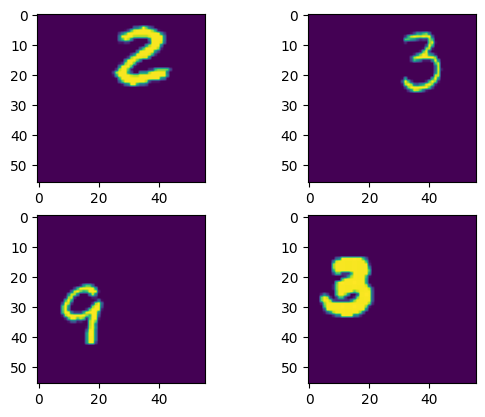

In [71]:
fig, axs = plt.subplots(nrows=2, ncols=2)

axs[0, 0].imshow(x_train_repos[25])
axs[0, 1].imshow(x_train_repos[50])
axs[1, 0].imshow(x_test_repos[150])
axs[1, 1].imshow(x_test_repos[200])

plt.show()

In [72]:
# Initialize the model
model = Sequential()

# Add the convolutional layers
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(56, 56, 1)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the fully connected layers
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 54, 54, 32)        320       
                                                                 
 conv2d_25 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 26, 26, 64)       0         
 g2D)                                                            
                                                                 
 flatten_42 (Flatten)        (None, 43264)             0         
                                                                 
 dense_97 (Dense)            (None, 128)               5537920   
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                     

In [73]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
CNN = model.fit(trainX, y_train, epochs=10, 
                    validation_data=(testX, y_test))

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2400 - accuracy: 0.9277 - val_loss: 20.4935 - val_accuracy: 0.2729
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1927 - accuracy: 0.9416 - val_loss: 21.0928 - val_accuracy: 0.2743
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1608 - accuracy: 0.9507 - val_loss: 21.3840 - val_accuracy: 0.2813
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1403 - accuracy: 0.9568 - val_loss: 22.4419 - val_accuracy: 0.2848
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1217 - accuracy: 0.9613 - val_loss: 22.4495 - val_accuracy: 0.2876
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1075 - accuracy: 0.9652 - val_loss: 23.5716 - val_accuracy: 0.2840
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0974 - accuracy: 0.9688 - val_loss: 24.2121 -

In [76]:
print(CNN.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


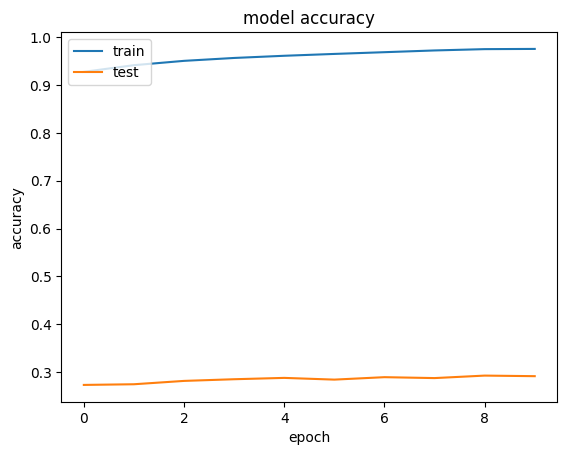

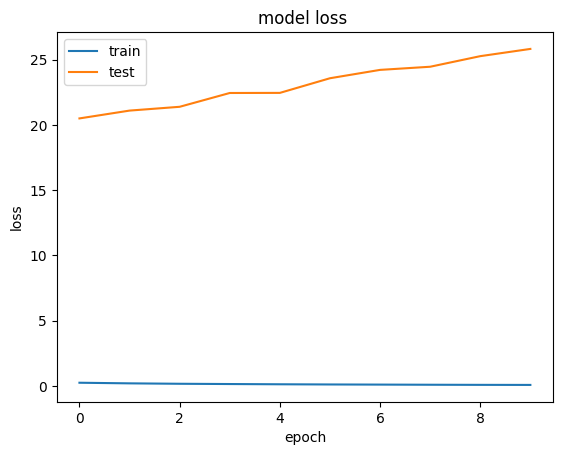

In [77]:
# Plot for accuracy
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Plot for loss
plt.plot(CNN.history['loss'])
plt.plot(CNN.history['val_loss'])
plt.title('model loss ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
score = model.evaluate(testX, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 25.818544387817383
Test accuracy: 0.29120001196861267


In [79]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [80]:
preds = probability_model(testX[:5])
prediction=tf.argmax(preds,1).numpy()
print(prediction)

[1 2 1 0 1]


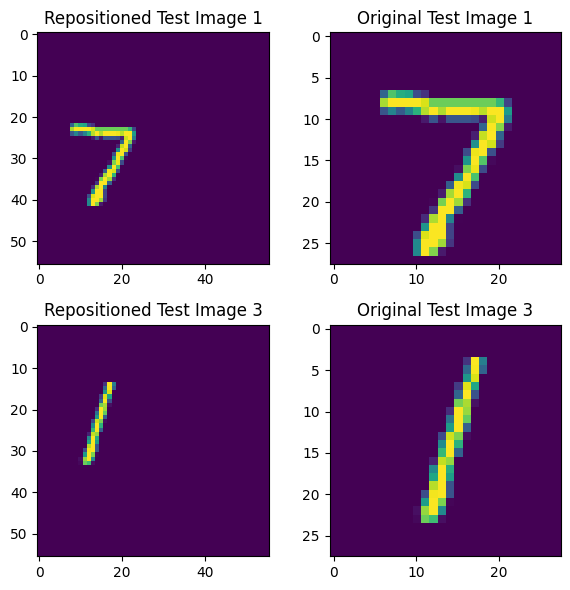

In [81]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6))
axs[0, 0].imshow(x_test_repos[0])
axs[0, 0].set_title('Repositioned Test Image 1')
axs[0, 1].imshow(x_test[0])
axs[0, 1].set_title('Original Test Image 1')
axs[1, 0].imshow(x_test_repos[2])
axs[1, 0].set_title('Repositioned Test Image 3')
axs[1, 1].imshow(x_test[2])
axs[1, 1].set_title('Original Test Image 3')
plt.tight_layout()
plt.show()